In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import utils.rd_plot_functions as pf  
import pandas as pd
sns.set_style('darkgrid')

# Model comparisons

In [3]:
rd_lca = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/rd_lca_fixed_width')
rd_ica = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/rd_ica_fixed_width')
rd_pca = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/rd_pca_fixed_width')

In [21]:
rd_pca_raw = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/pca_raw/rd')

In [24]:
rd_lca_ft = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/lca_ft/rd_ft_whiten_compensation')

In [6]:
rd_lca_nz = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/rd_lca_fixed_width_nozero')
rd_ica_nz = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/rd_ica_fixed_width_nozero')
rd_pca_nz = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/rd_pca_fixed_width_nozero')

In [18]:
rd_pca_mz = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/new_rd/pca_mz')

In [15]:
rd_lca_mz = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/new_rd/lca_mz')

In [20]:
rd_lca_mz_v3 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/new_rd/lca_mz_v3')

In [5]:
rd_lca_new = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/test')

In [3]:
rd_pca_new = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/rd_pca_fresh')

In [9]:
rd_ica_new = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/ica_newbins')

In [48]:
rd_pca_nz = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/pca_uniform_nozero')

In [54]:
rd_ica_nz = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/ica_uniform_nozero')

In [38]:
rd_lca_nz = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/lca_uniform_nozero')

In [3]:
rd_alts = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/alt_mods/coeffs/rd_alts')
rd_ica = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/ica/coeffs/rd_ica_v3')
rd_lca = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/nowht_v3/coeffs/rd_256_v3')
rd_rg = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/rg_zca/coeffs/rd_rg_zca_wht_v2_test')

In [19]:
rd_alts = pd.read_pickle('/media/tbell/sanborn/cosyne/rd_pcao')
rd_ica = pd.read_pickle('/media/tbell/sanborn/cosyne/rd_ica_nowhite')
rd_lca = pd.read_pickle('/media/tbell/sanborn/cosyne/rd_lca_all')

In [4]:
frames = [rd_alts, rd_ica]
rd_alts = pd.concat(frames)
rd_alts = rd_alts.sort_values(['model', 'n_bins'])
rd_lca = rd_lca.sort_values(['model', 'n_bins'])

## Alternative models

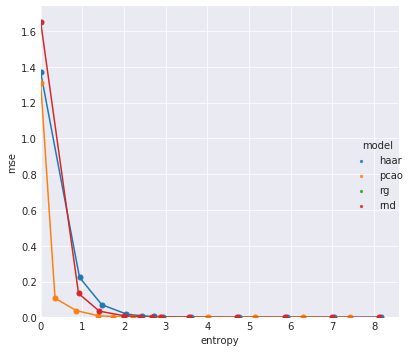

In [7]:
pf.alt_models_plots(rd_alts, y='mse')

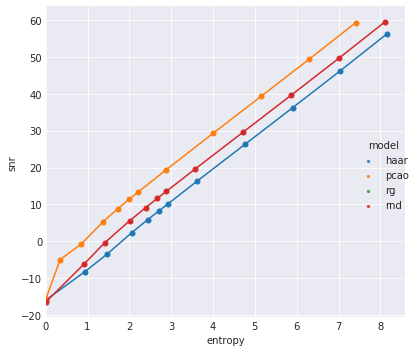

In [8]:
pf.alt_models_plots(rd_alts, y='snr')

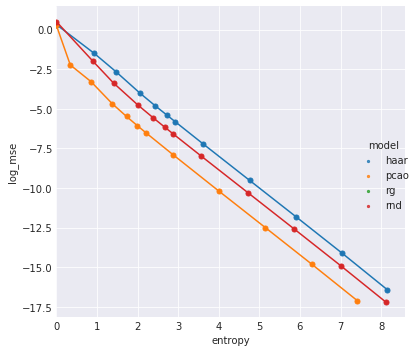

In [9]:
pf.alt_models_plots(rd_alts, y='log_mse')

In [20]:
rd_pca_mz

,model,n_neurons,overcompleteness,cost,lambda,p_active,n_active,mse,mse_sd,log_mse,entropy,transmission_rate,bin_width,num_bins,bin_ratio
0,pca,256,1.0,l0,0.5,0.99879,255.69024,8.291277330263829e-08,5.46853169512e-09,-16.3054767058,6.560832,6.560832238159362,0.001,80002.0,0.000161360837599
1,pca,256,1.0,l0,0.5,0.99879,255.69024,8.288393758534666e-06,5.53185181395e-07,-11.7006543641,4.284452,4.284451714879808,0.01,8002.0,0.00161360837599
2,pca,256,1.0,l0,0.5,0.99879,255.69024,0.00020393526950532778,2.45842761449e-05,-8.49770792082,2.693985,2.6939850331649478,0.05,1602.0,0.00806804187996
3,pca,256,1.0,l0,0.5,0.99879,255.69024,0.00079488770341465,0.000129313487969,-7.13730970685,2.025653,2.02565322096715,0.1,802.0,0.0161360837599
4,pca,256,1.0,l0,0.5,0.99879,255.69024,0.0056710740306910165,0.0018070130495,-5.17237675578,1.040165,1.0401649118071823,0.3,270.0,0.0484082512798
5,pca,256,1.0,l0,0.5,0.99879,255.69024,0.012244152740370792,0.00513856390982,-4.40270678327,0.668917,0.6689172550290053,0.5,162.0,0.0806804187996
6,pca,256,1.0,l0,0.5,0.99879,255.69024,0.021016681378467468,0.0104003968926,-3.86243880523,0.442782,0.44278183633328255,0.75,110.0,0.121020628199
7,pca,256,1.0,l0,0.5,0.99879,255.69024,0.029870085881157245,0.0161570748951,-3.51089777159,0.321259,0.32125937722237696,1,82.0,0.161360837599
8,pca,256,1.0,l0,0.5,0.99879,255.69024,0.038614574817627534,0.0220996379463,-3.25412548783,0.246769,0.24676902734083708,1.25,66.0,0.201701046999
9,pca,256,1.0,l0,0.5,0.99879,255.69024,0.04719236761327297,0.0281469251871,-3.05352310257,0.197068,0.19706848140507166,1.5,56.0,0.242041256399


## Full comparisons

In [19]:
rd_pca_mz.entropy = [float(x) for x in rd_pca_mz.entropy]

In [6]:
rd_lca_ft.mse = [float(x) for x in rd_lca_ft.mse]

In [8]:
rd_lca_ft.ssim = [float(x) for x in rd_lca_ft.ssim]

AxesSubplot(0.0805097,0.0664931;0.902289x0.890451)


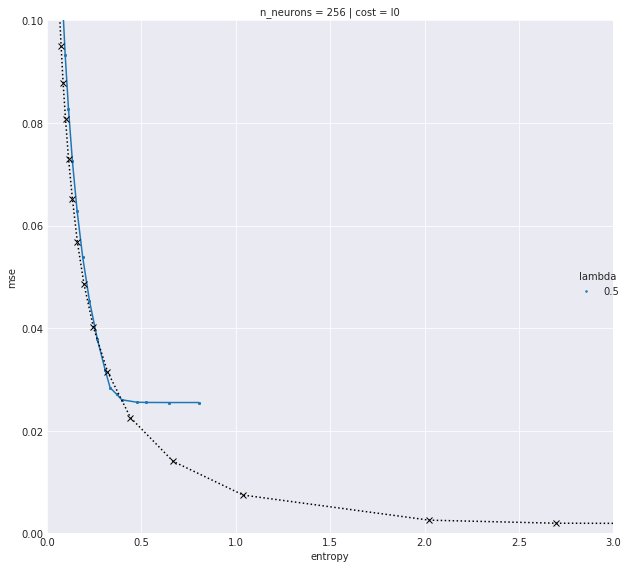

In [29]:
p = sns.lmplot('entropy', 'mse', data=rd_lca_mz_v3, size=8, row='n_neurons', col='cost', hue='lambda', fit_reg=False, scatter_kws={"s": 3})
p.map(plt.plot, 'entropy', 'mse', marker="o", ms=2)
axes = p.axes.flatten()
for idx, a in enumerate(axes):
    print(a)
    a.set_ylim(0, .1)
    a.set_xlim(0, 3)
a.plot(rd_pca_mz['entropy'], rd_pca_mz['mse'], marker="x", color="black", linestyle="dotted")
# a.plot(rd_lca_mz['entropy'], rd_lca_mz['mse'], marker=".", color="black", linestyle="dashed")

AxesSubplot(0.0904819,0.0664931;0.892314x0.890451)


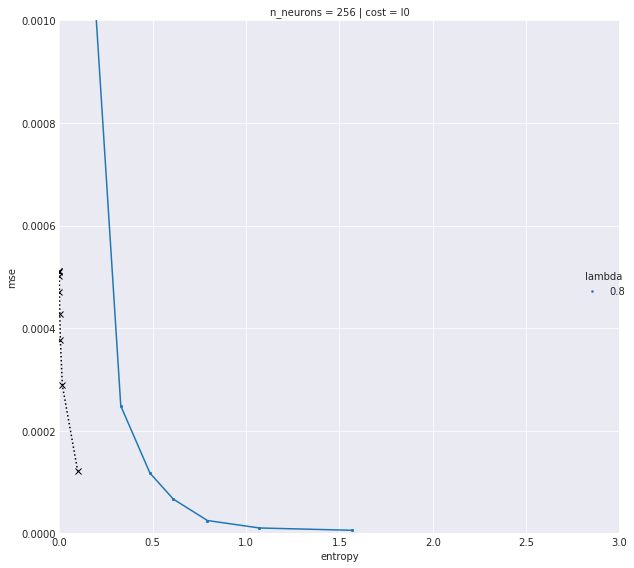

In [25]:
p = sns.lmplot('entropy', 'mse', data=rd_lca_ft, size=8, row='n_neurons', col='cost', hue='lambda', fit_reg=False, scatter_kws={"s": 3})
p.map(plt.plot, 'entropy', 'mse', marker="o", ms=2)
axes = p.axes.flatten()
for idx, a in enumerate(axes):
    print(a)
    a.set_ylim(0, .001)
    a.set_xlim(0, 3)
a.plot(rd_pca_raw['entropy'], rd_pca_raw['mse'], marker="x", color="black", linestyle="dotted")
# a.plot(rd_lca_mz['entropy'], rd_lca_mz['mse'], marker=".", color="black", linestyle="dashed")

In [18]:
import numpy as np

In [74]:
with np.load('/media/tbell/sanborn/rd_analysis/outputs/lca_fresh/coeffs/lca_256_l0_0.7_v4.0_coeffs.npz') as d:
    lca_coeffs = d['arr_0']

In [75]:
np.count_nonzero(lca_coeffs, axis=1)

array([32, 39, 30, ..., 30, 24, 37])

In [63]:
with np.load('/media/tbell/sanborn/rd_analysis/inputs/test_nw_fresh.npz') as d:
    test = d['arr_0'].item()

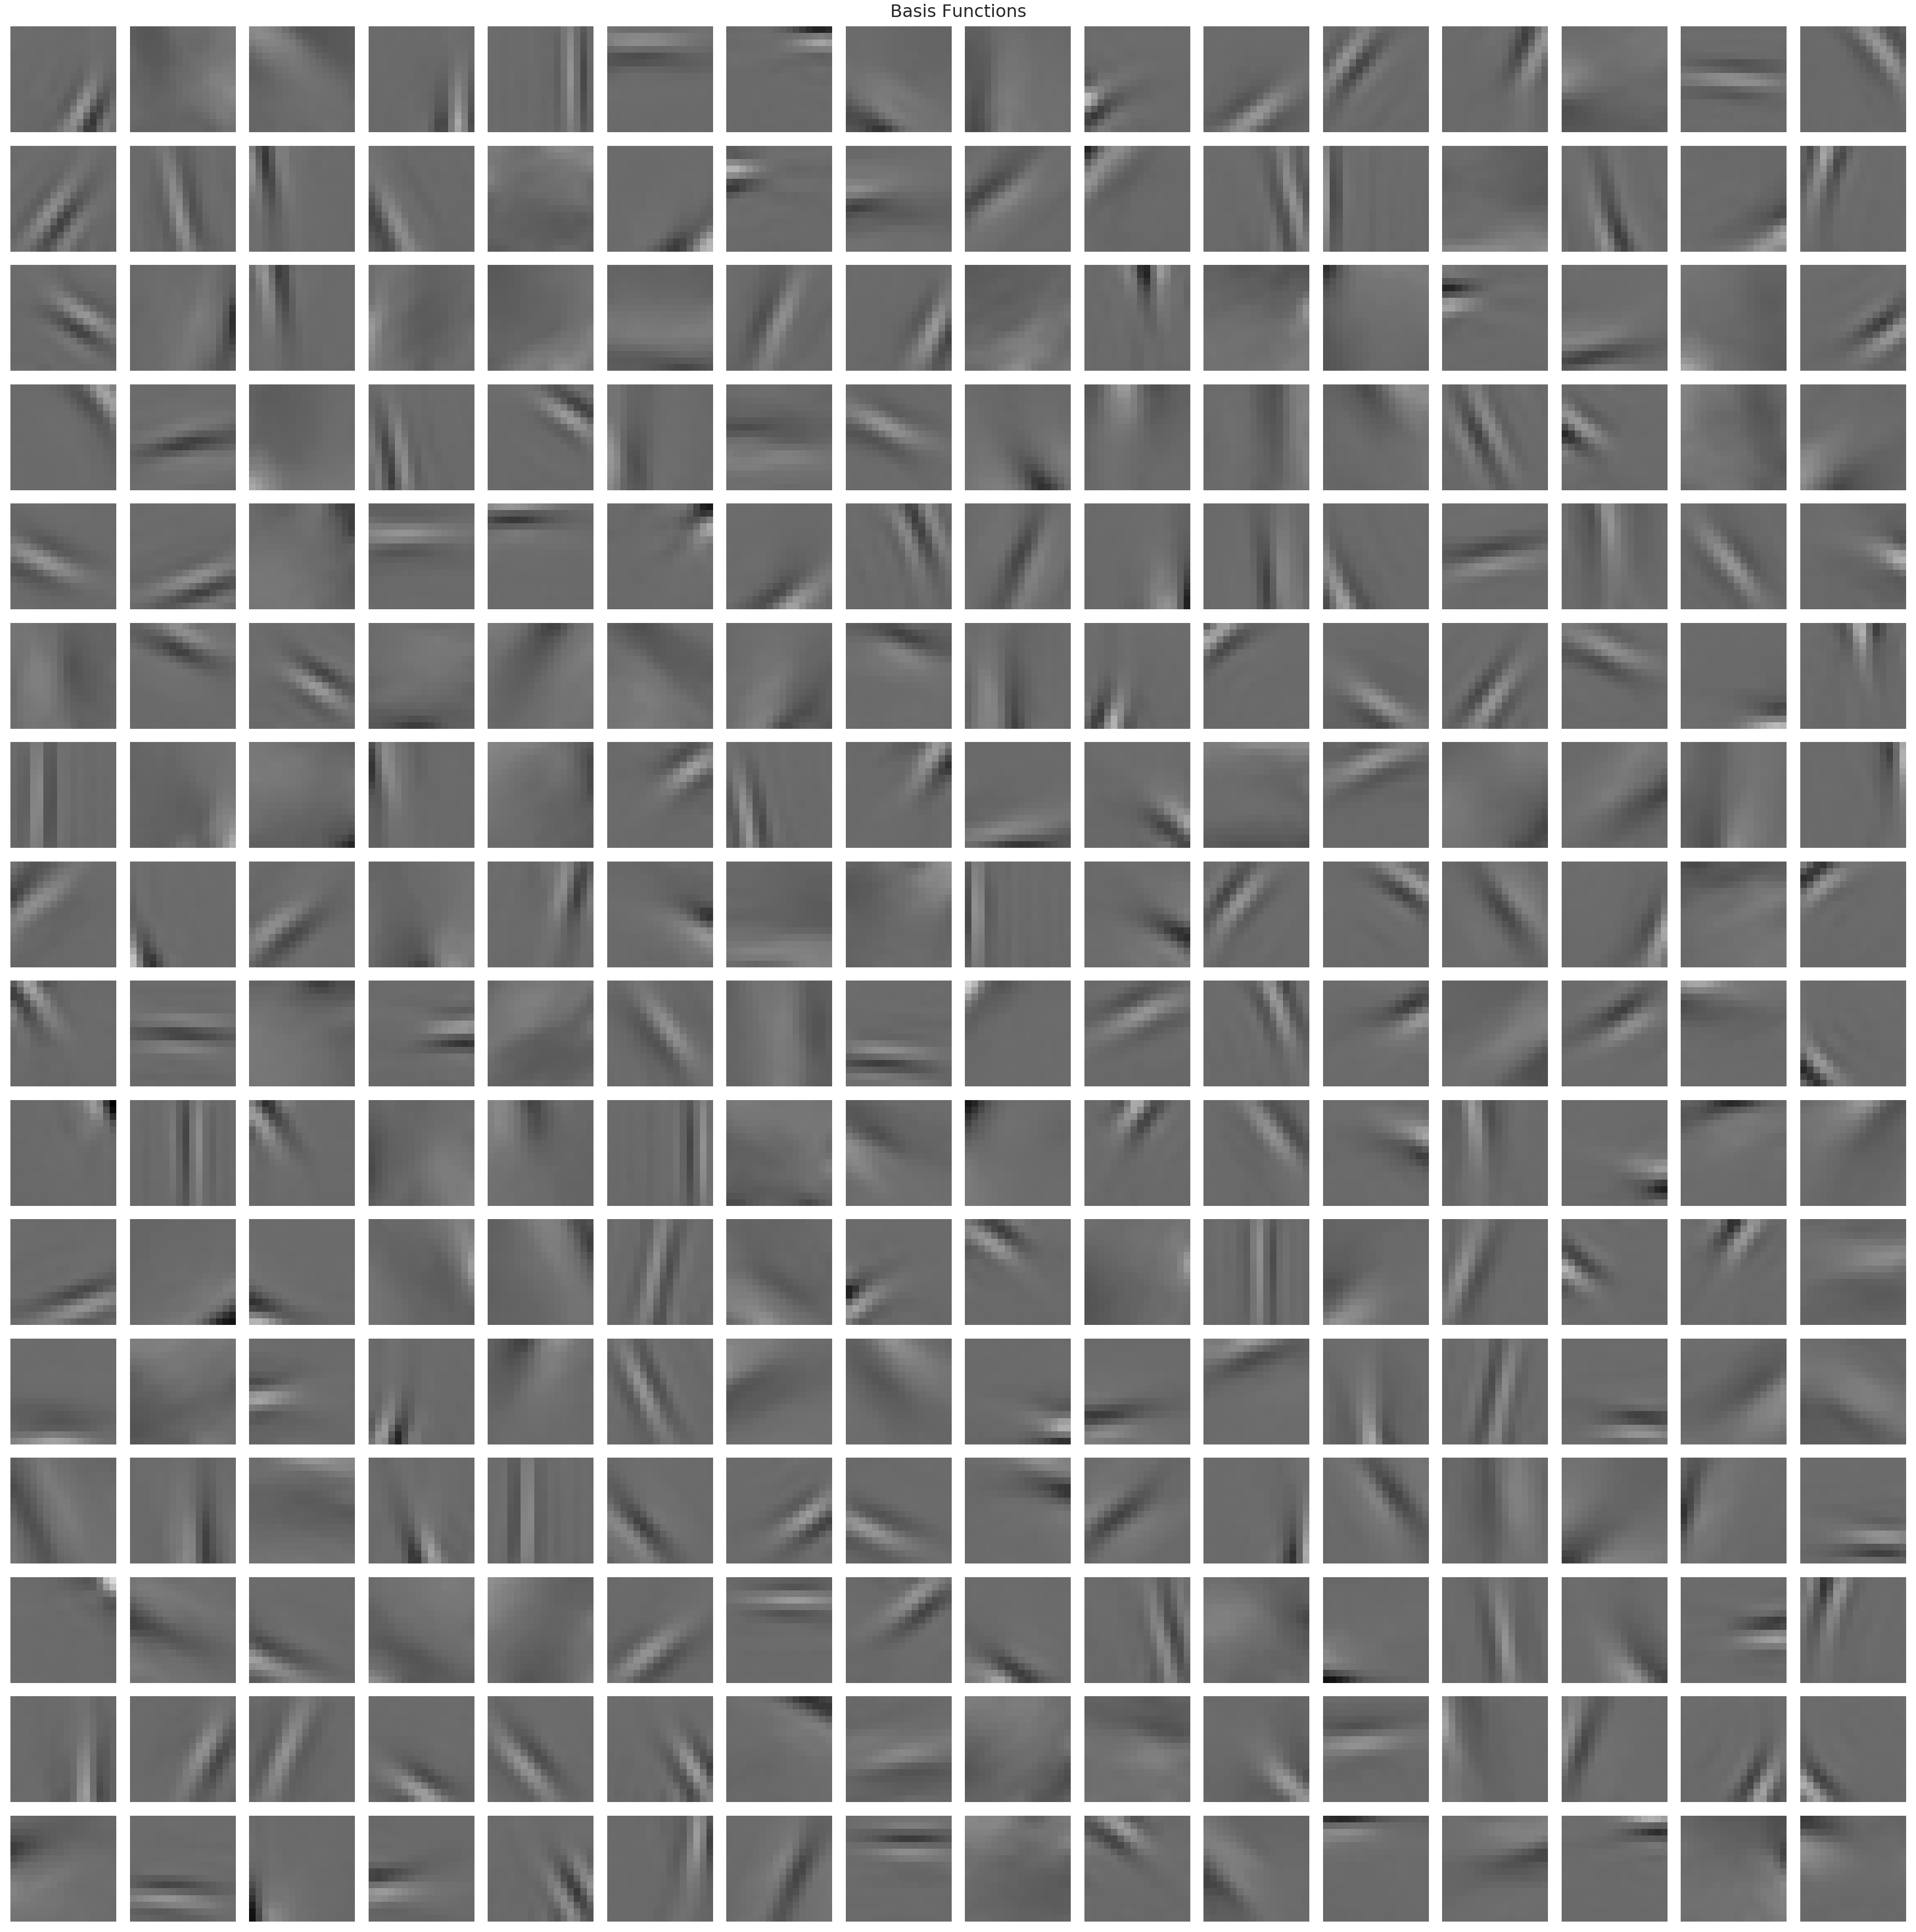

In [20]:
pf.plot_bases(lca_weights)

AxesSubplot(0.0705554,0.0664931;0.912244x0.890451)


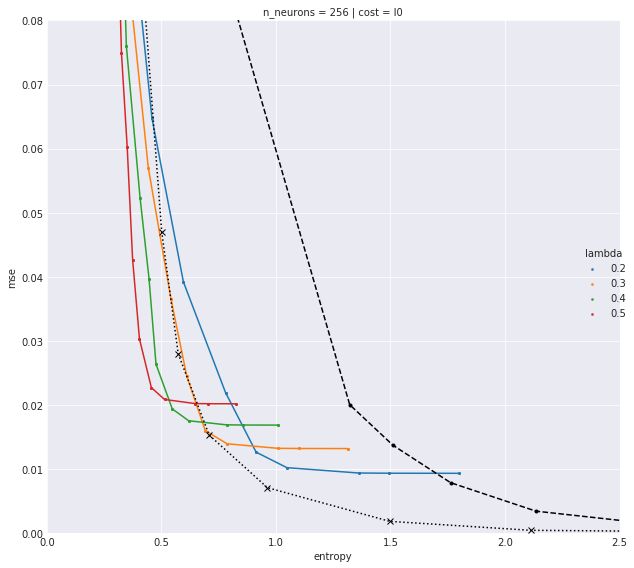

In [77]:
p = sns.lmplot('entropy', 'mse', data=rd_lca_nz.where(rd_lca_nz['lambda'] != '0.1'), size=8, row='n_neurons', col='cost', hue='lambda', fit_reg=False, scatter_kws={"s": 3})
p.map(plt.plot, 'entropy', 'mse', marker="o", ms=2)
axes = p.axes.flatten()
for idx, a in enumerate(axes):
    print(a)
    a.set_ylim(0, .08)
    a.set_xlim(0, 2.5)
a.plot(rd_pca_nz['entropy'], rd_pca_nz['mse'], marker="x", color="black", linestyle="dotted")
a.plot(rd_ica_nz['entropy'], rd_ica_nz['mse'], marker=".", color="black", linestyle="dashed")

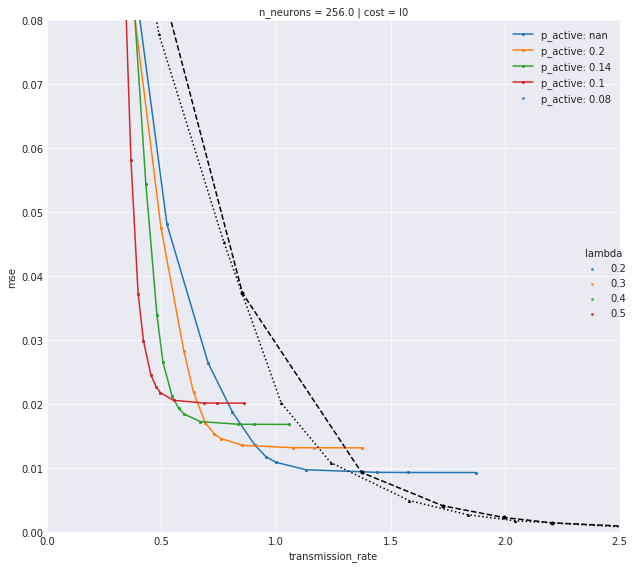

In [8]:
pf.full_comparison_plots(rd_lca2.where(rd_lca2['n_neurons'] == 256), alt_1=rd_alts.where(rd_alts.model=='pcao'), size=8, alt_3=rd_ica, y='mse', x='transmission_rate',xlim=2.5,  ylim=0.08)